In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(xtrain, ytrain), (xtest, ytest) = tf.keras.datasets.mnist.load_data()
print('X - Train Shape: ', xtrain.shape)
print('Y - Train Shape: ', ytrain.shape)
print('X - Test Shape: ', xtest.shape)
print('Y - Test Shape: ', ytest.shape)
xtrain = np.reshape(xtrain, (xtrain.shape[0], 784)) / 255
xtest = np.reshape(xtest, (xtest.shape[0], 784)) / 255
ytest = tf.keras.utils.to_categorical(ytest)
ytrain = tf.keras.utils.to_categorical(ytrain)

print('========================')
print('X - Train Shape: ', xtrain.shape)
print('Y - Train Shape: ', ytrain.shape)
print('X - Test Shape: ', xtest.shape)
print('Y - Test Shape: ', ytest.shape)

X - Train Shape:  (60000, 28, 28)
Y - Train Shape:  (60000,)
X - Test Shape:  (10000, 28, 28)
Y - Test Shape:  (10000,)
X - Train Shape:  (60000, 784)
Y - Train Shape:  (60000, 10)
X - Test Shape:  (10000, 784)
Y - Test Shape:  (10000, 10)


# Plotting Random Samples

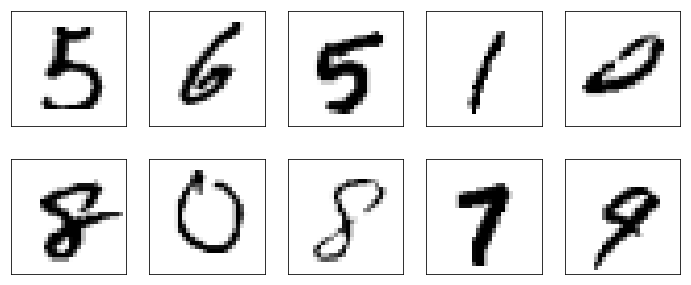

In [19]:
# since i want to check individual results, will write this in a function later
#get 10 numbers between 0 and 60000 to get random samples
indices = np.random.choice(range(0, xtrain.shape[0]), 10)
y = np.argmax(ytrain, axis = 1)
plt.figure(figsize = (12,5))
for i, index in enumerate(indices):
    plt.subplot(2,5,i+1)
    plt.imshow(xtrain[index].reshape(28,28), cmap = 'binary')
    plt.xticks([])
    plt.yticks([])
    
    
    

In [22]:
#in function form here p is predictions array. np.argmax(predictions)
def plot_random_examples(x, y, p=None):
    indices = np.random.choice(range(0, x.shape[0]), 10)
    y = np.argmax(y, axis=1)
    if p is None:
        p = y
    plt.figure(figsize=(10, 5))
    for i, index in enumerate(indices):
        plt.subplot(2, 5, i+1)
        plt.imshow(x[index].reshape((28, 28)), cmap='binary')
        plt.xticks([])
        plt.yticks([])
        if y[index] == p[index]:
            col = 'g'
        else:
            col = 'r'
        plt.xlabel(str(p[index]), color=col)
    return plt

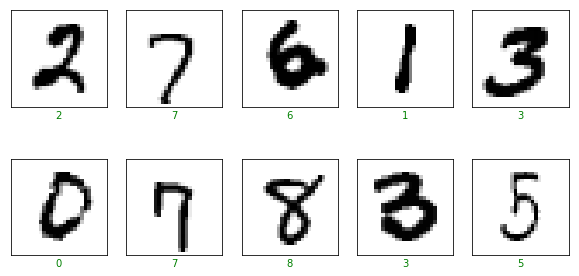

In [23]:
plot_random_examples(xtrain, ytrain).show()

In [25]:
class ParametricRelu(tf.keras.layers.Layer):
    def __init__(self , **kwargs):
        super(ParametricRelu, self).__init__(**kwargs)
    
    def build(self, input_shape):
        self.alpha = self.add_weight(
            name = 'minimum',
            shape = (1,),
            initializer = 'zeros',
            trainable = True
        
        )
        
        super(ParametricRelu, self).build(input_shape)
    
    def call(self, x):
        
        return tf.maximum(0., x) + self.alpha * tf.minimum(0., x)
    
    

In [26]:
def create_model(use_prelu = True):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(64, input_shape = (784,)))
    
    if not use_prelu:
        model.add(tf.keras.layers.ReLU())
    else:
        model.add(ParametricRelu())
        
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model()
model.summary()
        

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
parametric_relu (ParametricR (None, 64)                1         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,891
Trainable params: 50,891
Non-trainable params: 0
_________________________________________________________________


In [29]:
print('Initial alpha', model.layers[1].get_weights())
h = model.fit(
    xtrain, ytrain,
    validation_data=(xtest, ytest),
    epochs=5
)

print('Final alpha', model.layers[1].get_weights())

Initial alpha [array([ 0.], dtype=float32)]
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 69us/step - loss: 0.2957 - acc: 0.9157 - val_loss: 0.1499 - val_acc: 0.9554
Epoch 2/5
60000/60000 [==============================] - 3s 54us/step - loss: 0.1271 - acc: 0.9625 - val_loss: 0.1080 - val_acc: 0.9663
Epoch 3/5
60000/60000 [==============================] - 3s 50us/step - loss: 0.0904 - acc: 0.9723 - val_loss: 0.1029 - val_acc: 0.9685
Epoch 4/5
60000/60000 [==============================] - 3s 52us/step - loss: 0.0707 - acc: 0.9782 - val_loss: 0.0970 - val_acc: 0.9701
Epoch 5/5
60000/60000 [==============================] - 3s 50us/step - loss: 0.0571 - acc: 0.9822 - val_loss: 0.0974 - val_acc: 0.9719
Final alpha [array([-0.80582005], dtype=float32)]


In [34]:
def plot_results(history):
    history = history.history
    plt.figure(figsize=(12, 4))
    epochs = len(history['val_loss'])
    plt.subplot(1, 2, 1)
    plt.plot(range(epochs), history['val_loss'], label='Val Loss')
    plt.plot(range(epochs), history['loss'], label='Train Loss')
    plt.xticks(list(range(epochs)))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(range(epochs), history['val_acc'], label='Val Acc')
    plt.plot(range(epochs), history['acc'], label='Acc')
    plt.xticks(list(range(epochs)))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    return plt

<module 'matplotlib.pyplot' from 'D:\\Anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

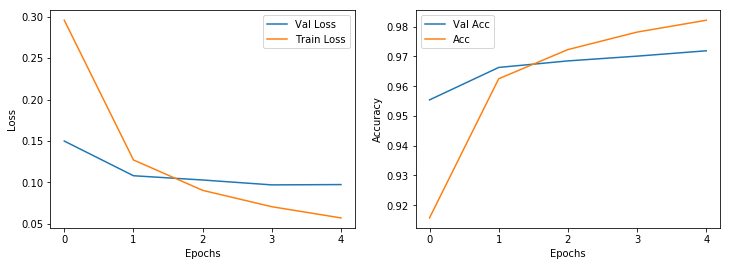

In [35]:
plot_results(h).show()

In [36]:
model = create_model(use_prelu=False)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
re_lu (ReLU)                 (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [38]:
h = model.fit(
    xtrain, ytrain,
    validation_data=(xtest, ytest),
    epochs=5
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 59us/step - loss: 0.2963 - acc: 0.9166 - val_loss: 0.1714 - val_acc: 0.9512
Epoch 2/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.1453 - acc: 0.9570 - val_loss: 0.1246 - val_acc: 0.9625
Epoch 3/5
60000/60000 [==============================] - 4s 59us/step - loss: 0.1073 - acc: 0.9684 - val_loss: 0.1127 - val_acc: 0.9657
Epoch 4/5
60000/60000 [==============================] - 3s 53us/step - loss: 0.0846 - acc: 0.9748 - val_loss: 0.1043 - val_acc: 0.9678
Epoch 5/5
60000/60000 [==============================] - 3s 53us/step - loss: 0.0699 - acc: 0.9788 - val_loss: 0.0934 - val_acc: 0.9709


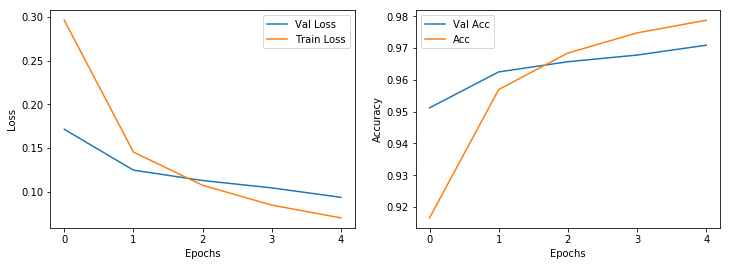

In [39]:
plot_results(h).show()